In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np

In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")
df['new_cases'] = df.cases - df.cases.shift().fillna(0)
df.date = pd.to_datetime(df.date)
df.set_index('date',inplace=True)
df['weekly_avg'] = df.new_cases.rolling(window=7).mean().fillna(0)
df.tail()

,cases,deaths,new_cases,weekly_avg
date,,,,
2021-02-10,27329382,471360,94917.0,104563.142857
2021-02-11,27434981,475238,105599.0,101672.000000
2021-02-12,27534539,480701,99558.0,97384.000000
2021-02-13,27619266,484074,84727.0,94484.285714
2021-02-14,27683116,485154,63850.0,91130.142857


In [67]:
ts = pd.DataFrame({'ds':df.index,'y':df.new_cases})
ts.head()

,ds,y
date,,
2020-01-21,2020-01-21,1.0
2020-01-22,2020-01-22,0.0
2020-01-23,2020-01-23,0.0
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,1.0


In [74]:
m = Prophet()
m.fit(ts)

future = m.make_future_dataframe(periods=100)
forcast = m.predict(future)
forcast[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,-7997.396657,-50473.385300,36076.170513
1,2020-01-22,-3881.016569,-49936.003191,41907.250508
2,2020-01-23,-1504.585498,-45150.540174,49650.174479
3,2020-01-24,1471.033396,-45435.019099,43363.230217
4,2020-01-25,-5278.991361,-50020.572878,39054.594402
...,...,...,...,...
486,2021-05-21,297736.425602,252151.406571,347340.152057
487,2021-05-22,291580.543256,245500.786804,340780.187424
488,2021-05-23,279414.345321,230434.672409,326477.102142
489,2021-05-24,290317.050675,247157.659022,334111.247542


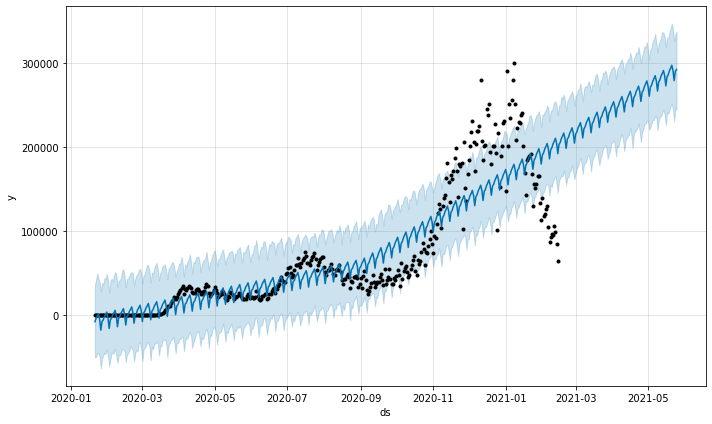

In [75]:
fig = m.plot(forcast)

In [76]:
from fbprophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(),m,forcast)

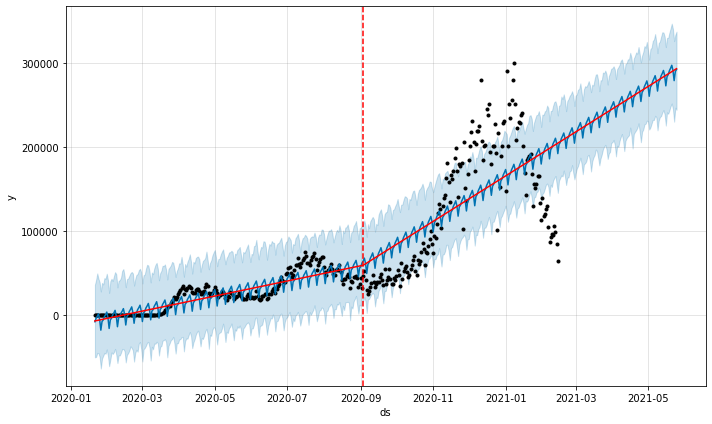

In [77]:
fig

In [72]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forcast)